# Builing Machine Learning Pipelines: Data Analysis Phase

# Project Name: House Price Predication Advanced Regression Techniques
The main aim of this project is to predict the house price based on various feature

## All The Lifecycle of this project
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [ ]:
# Data Analysis phase
# Main aim to understand more about the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

## for feature scaling
from sklearn.preprocessing import MinMaxScaler

# For Machining Learning
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#for cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
dataset = pd.read_csv('R:\DIG PROJECT\MODEL DEPLOYMENT\data.csv')

## Print shape of dataset with rows and columns
print(dataset.shape)

(4600, 18)


In [ ]:
# Print the top 5 records
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

## In Data analysis phase i will analyze to find out the below points:
1. Missing Values
2. All the numerical variables
3. Distribution of the Numerical Variables
4. Outliers
5. Categorical Variables
* . Relationship between independent and dependent feature(price)

## 1. Missing Values

In [ ]:
# Step 1: Make a list of features with missing values
features_with_na = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 0]

# Step 2: Print the feature name and the percentage of missing values
for feature in features_with_na:
    missing_percentage = np.round((dataset[feature].isnull().mean()) * 100, 2)
    print(f"{feature}: {missing_percentage}% missing values")


### There is no missing value in the features

## 2. Numerical Variables


In [ ]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype!= 'object']
print('Number of Numerical variables :', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of Numerical variables : 13


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [ ]:
year_feature = [feature for feature in numerical_features if 'yr' in feature]

year_feature

['yr_built', 'yr_renovated']

In [ ]:
# explore the content of these year variables

for feature in year_feature:
    print(feature, dataset[feature].unique())

yr_built [1955 1921 1966 1963 1976 1938 1989 1985 1945 1948 1909 1980 1939 1965
 1956 1997 1987 1983 1923 1954 2005 1991 1959 1920 1979 1951 1967 2004
 2014 1995 1944 1992 1957 1978 1974 1950 1990 1949 1968 1977 1996 2001
 2000 1929 2006 2008 2009 2012 2013 2007 1986 1973 1988 1900 1928 1982
 1960 2003 1998 1942 1908 1958 1971 1975 1961 1924 1902 1962 1953 1999
 1994 1930 1984 2010 1912 1947 1916 1940 1970 1952 1964 1926 1905 1969
 1903 1943 1993 1946 1910 1904 1981 1906 1922 2011 2002 1917 1913 1914
 1937 1925 1932 1918 1972 1941 1919 1936 1911 1927 1931 1901 1907 1915
 1935 1933 1934]
yr_renovated [2005    0 1992 1994 2010 1988 2009 1969 2000 1979 1989 2014 1999 2003
 1983 1997 1912 1923 1954 2011 2001 2013 2006 1972 1985 1998 2004 1958
 2008 1970 1982 1986 1996 2002 1971 1990 1956 1945 1984 2012 1993 2007
 1981 1974 1963 1968 1995 1934 1953 1966 1955 1987 1960 1978 1980 1948
 1991 1913 1977 1975]


## 3. Distribution of the Numerical Variables

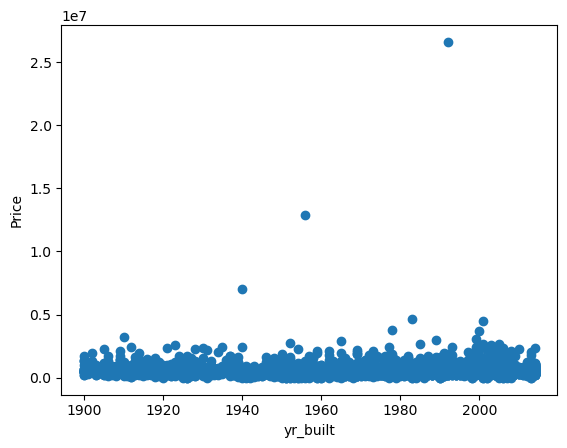

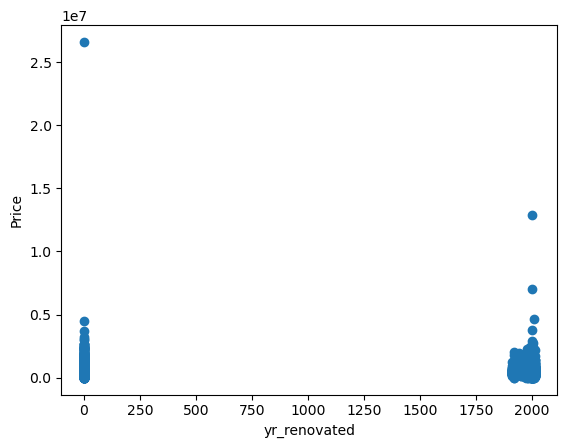

In [ ]:
#Analyse the datetime variables
# check whether there is a realation between yr_built and price , yr_renovated and price

for feature in year_feature:
    plt.scatter(dataset[feature],dataset['price'])
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()

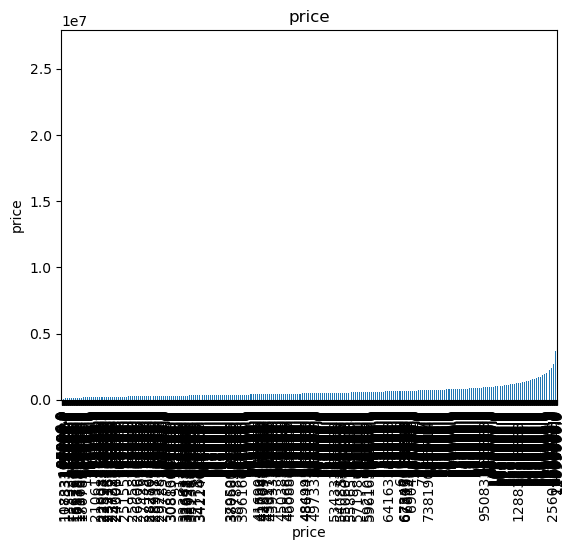

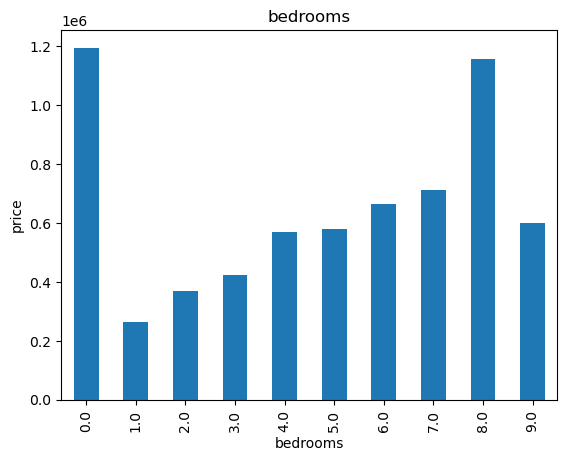

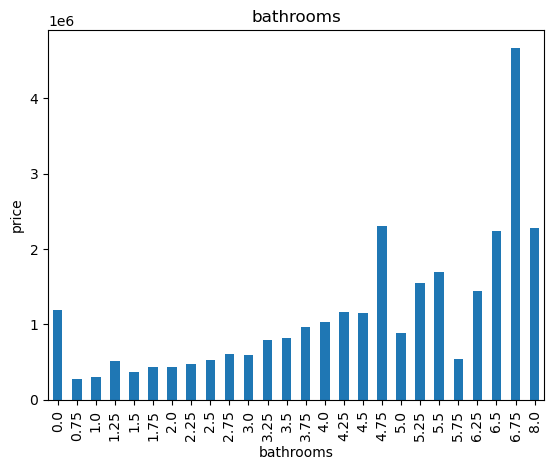

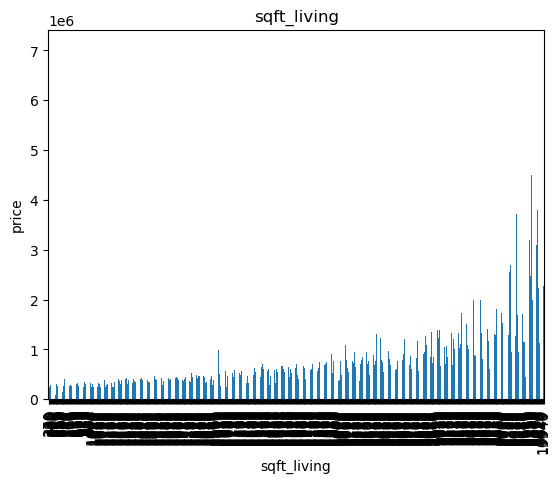

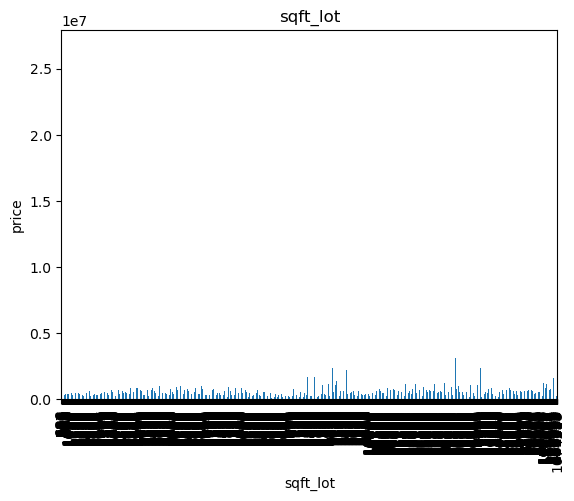

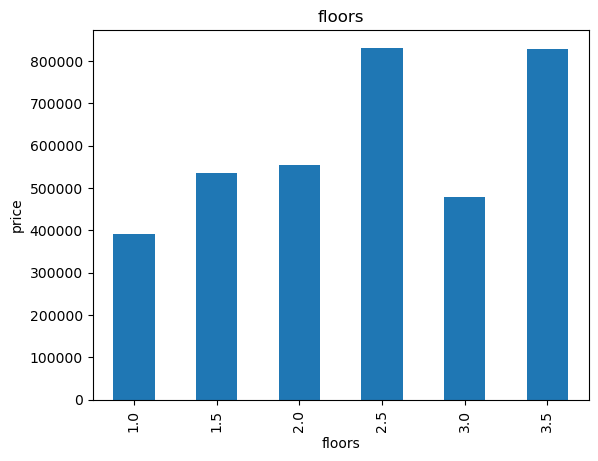

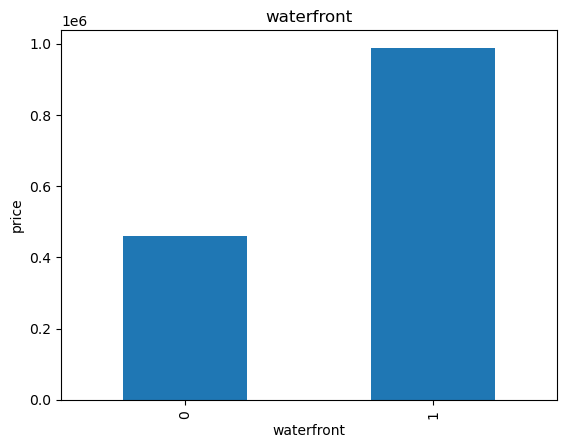

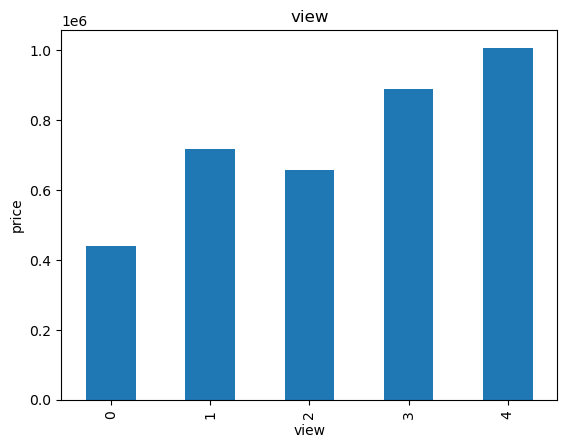

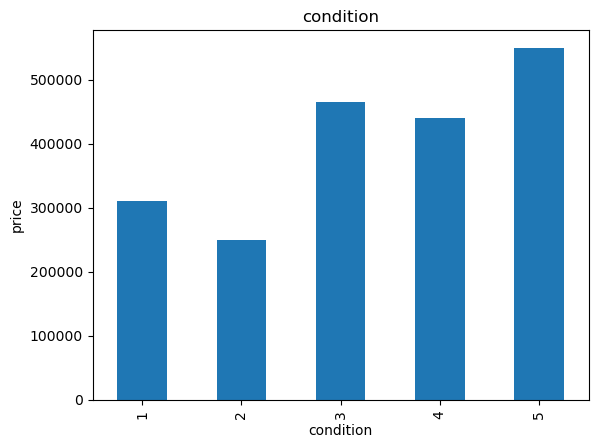

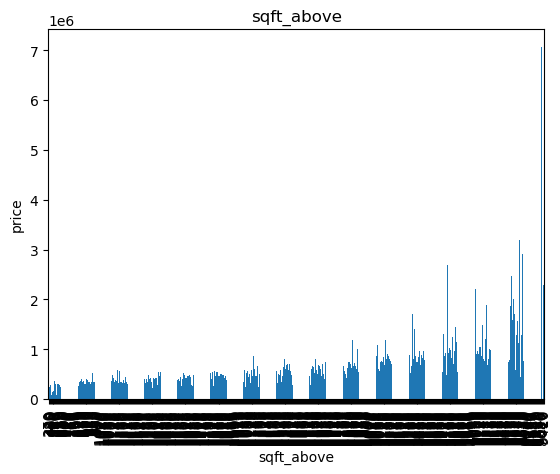

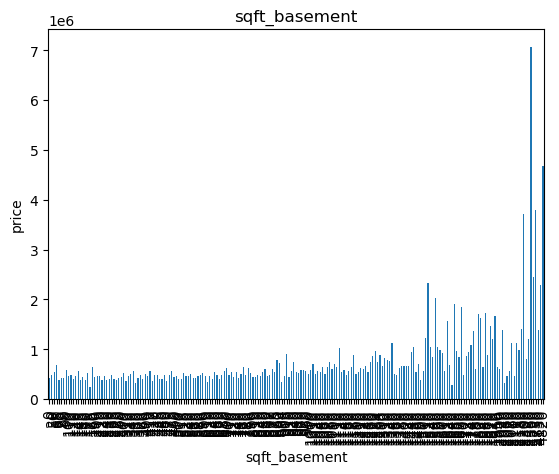

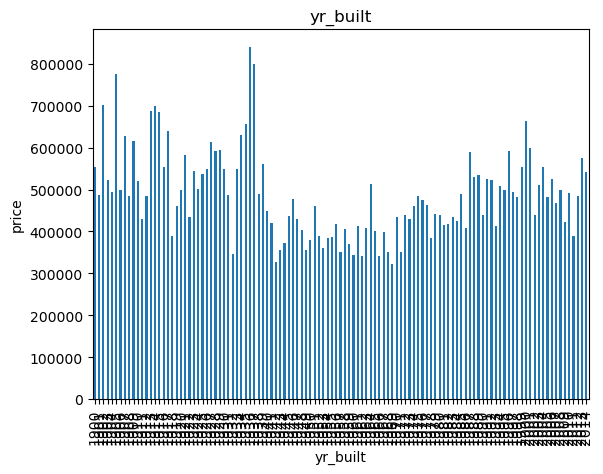

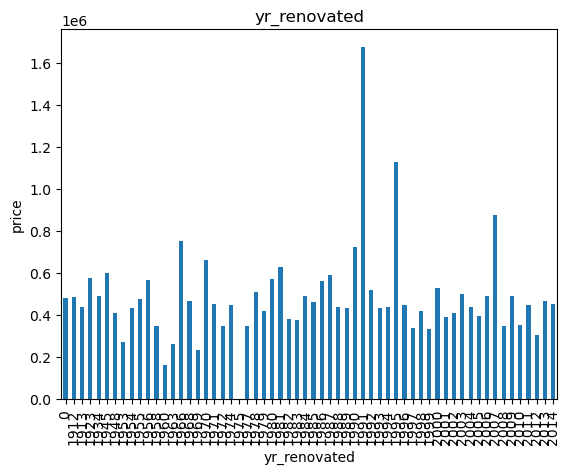

In [ ]:
for feature in numerical_features:
    data=dataset.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [ ]:
#There is a relationship between numerical variable & price

## 4. Outliers

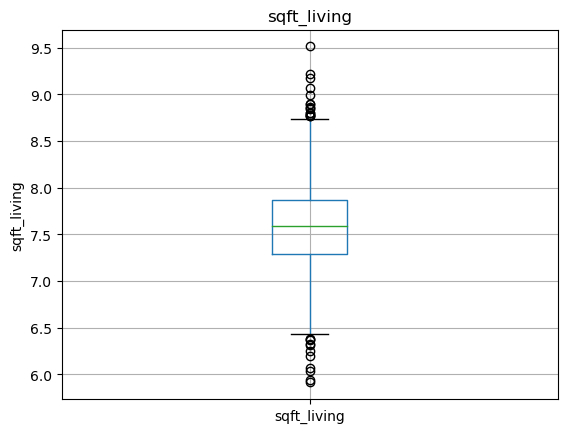

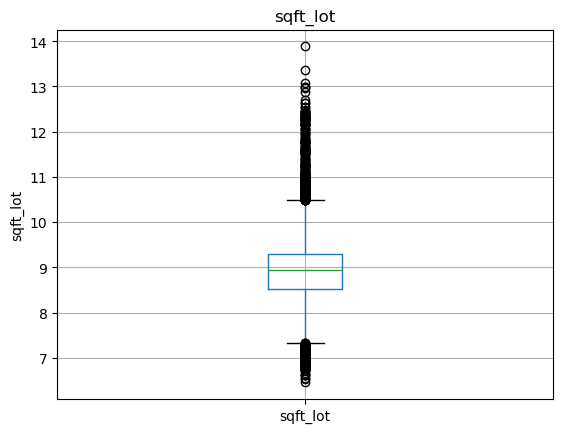

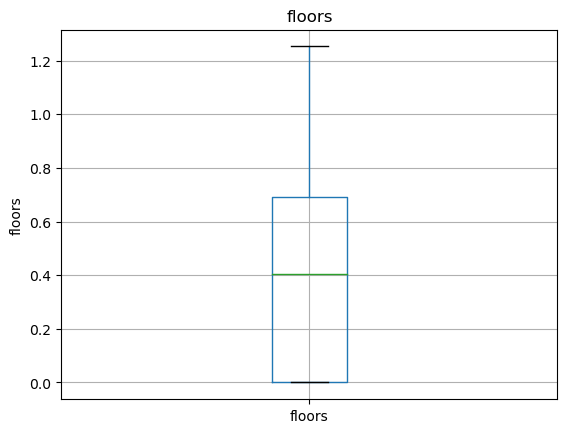

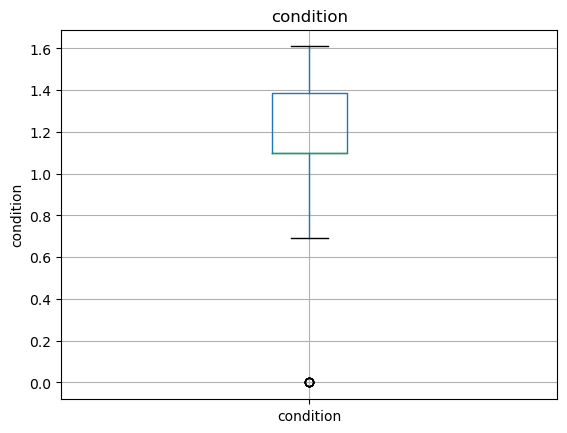

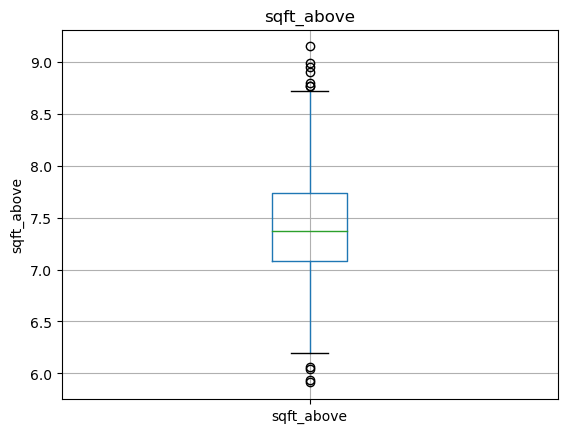

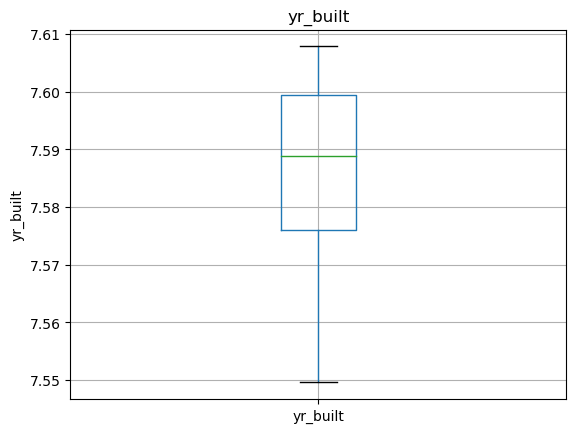

In [ ]:
for feature in numerical_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## 5. Categorical Variables

In [ ]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='object']
categorical_features

['date', 'street', 'city', 'statezip', 'country']

In [ ]:
dataset[categorical_features].head()

,date,street,city,statezip,country
0,2014-05-02 00:00:00,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is date and number of categories are 70
The feature is street and number of categories are 4525
The feature is city and number of categories are 44
The feature is statezip and number of categories are 77
The feature is country and number of categories are 1


In [ ]:
# Relationship between categorical variable & price

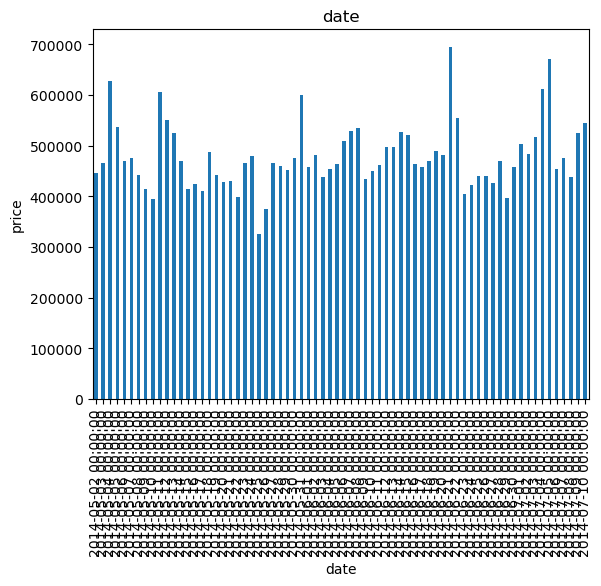

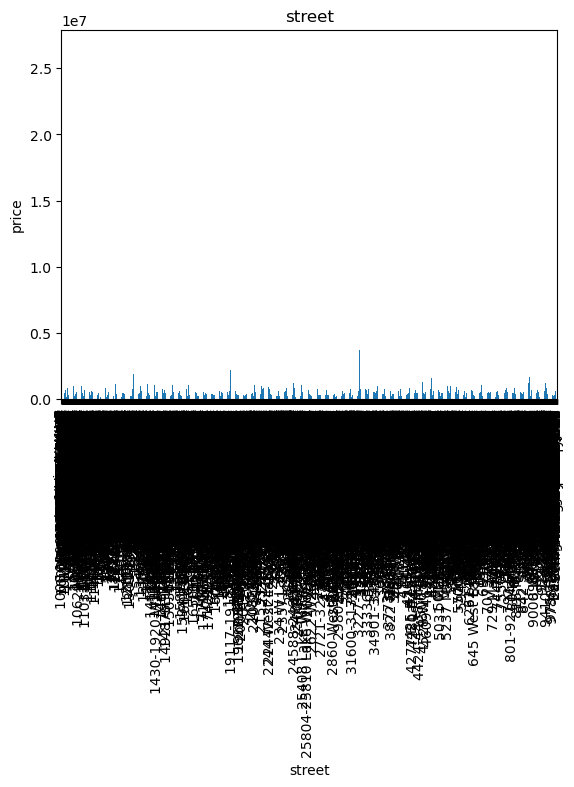

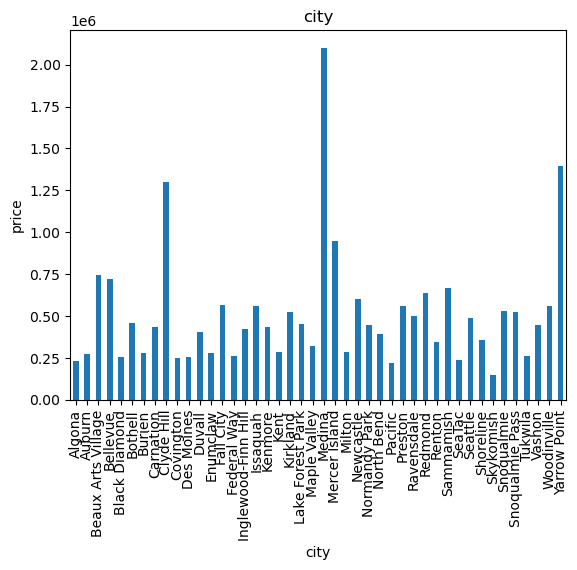

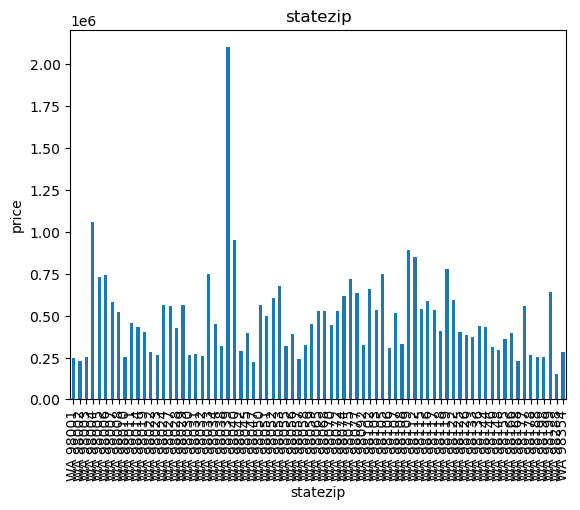

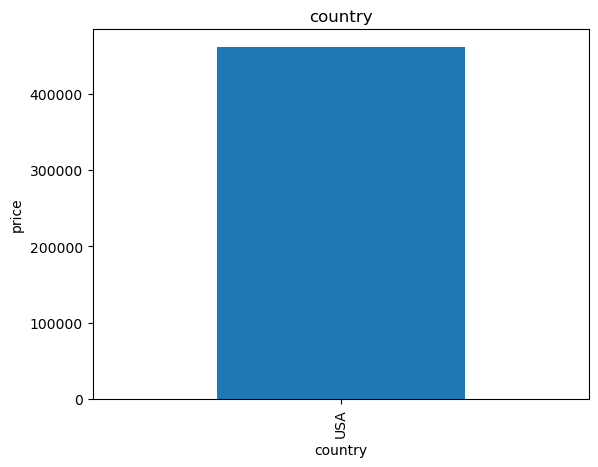

In [ ]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

In [ ]:
dataset['date'] = pd.to_datetime(dataset['date']).dt.strftime('%Y-%m-%d')

## Handling categorical features

In [ ]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [ ]:
dataset[categorical_features].head()

,date,street,city,statezip,country
0,24,1060,17,25,0
1,24,4499,30,70,0
2,24,1310,19,17,0
3,24,1929,39,52,0
4,24,2862,35,57,0


In [ ]:
# #Drop date column
dataset.drop('date', axis=1, inplace = True)

In [ ]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1060,17,25,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,4499,30,70,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,1310,19,17,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,1929,39,52,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,2862,35,57,0


In [ ]:
## Spiliting the data into training & testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['price'],test_size=0.1,random_state=0)

## Feature Scaling

In [ ]:
feature_scale=[feature for feature in dataset.columns if feature not in ['price']]


scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [ ]:
scaler.transform(dataset[feature_scale])

array([[0.33333333, 0.1875    , 0.07365224, ..., 0.39534884, 0.32894737,
        0.        ],
       [0.55555556, 0.3125    , 0.24905087, ..., 0.69767442, 0.92105263,
        0.        ],
       [0.33333333, 0.25      , 0.11845103, ..., 0.44186047, 0.22368421,
        0.        ],
       ...,
       [0.33333333, 0.3125    , 0.20045558, ..., 0.3255814 , 0.48684211,
        0.        ],
       [0.44444444, 0.25      , 0.13059985, ..., 0.69767442, 0.09210526,
        0.        ],
       [0.33333333, 0.3125    , 0.08504176, ..., 0.13953488, 0.22368421,
        0.        ]])

## Model Training
 1. Random Forest Regressor
 2. Gradiant Boosting Regressor

## 1. Random Forest Regressor

In [ ]:
x = dataset[feature_scale]
y = dataset['price']

In [ ]:
X_train, X_test = train_test_split(x, test_size = 0.1, random_state = 2)
Y_train, Y_test = train_test_split(y, test_size = 0.1, random_state = 2)

In [ ]:
rfr = RandomForestRegressor(n_estimators = 10)
rfr.fit(X_train, Y_train)
training_data_prediction =  rfr.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Square error of training data:", error_score)

R Square error of training data: 0.974806310943533


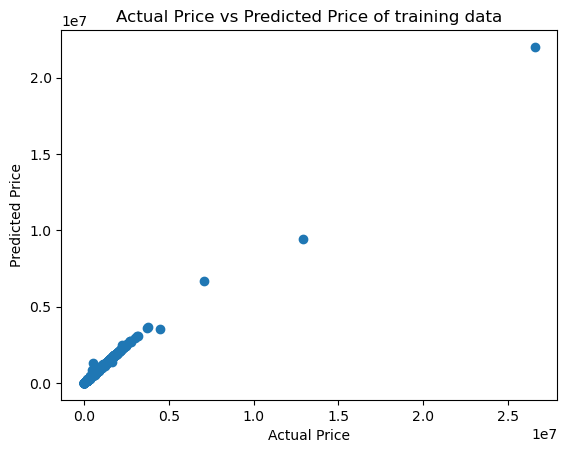

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price of training data")
plt.show()

In [ ]:
# Testing data
test_data_prediction = rfr.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R square Error testing data :", error_score)

R square Error testing data : 0.8287506481623267


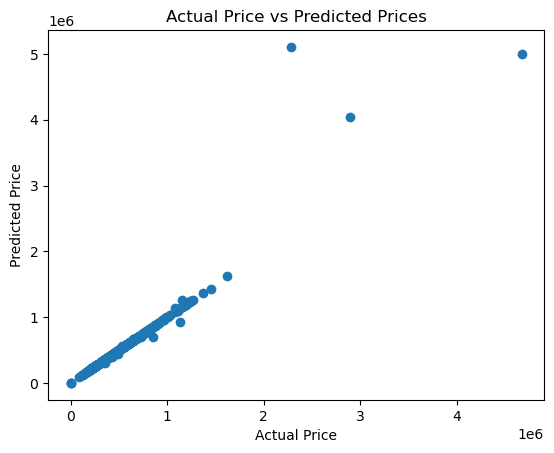

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

# 2. Gradiant Boosting Regressor

In [ ]:
gbr =  GradientBoostingRegressor()
gbr.fit(X_train, Y_train)
training_data_prediction = gbr.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R square Error Training data :", error_score)

R square Error Training data : 0.999383350928062


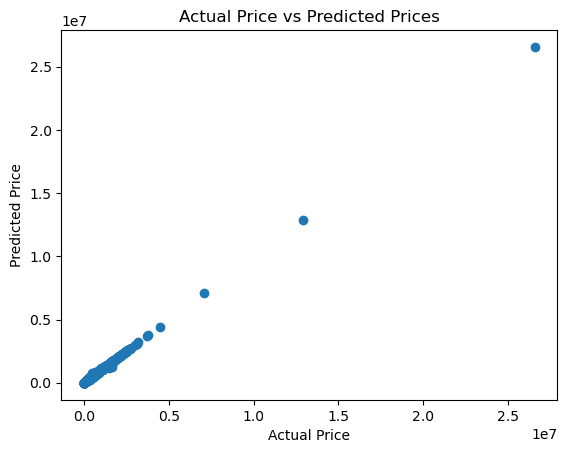

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction = gbr.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R square Error testing data : ", error_score)

R square Error testing data :  0.9884771133760298


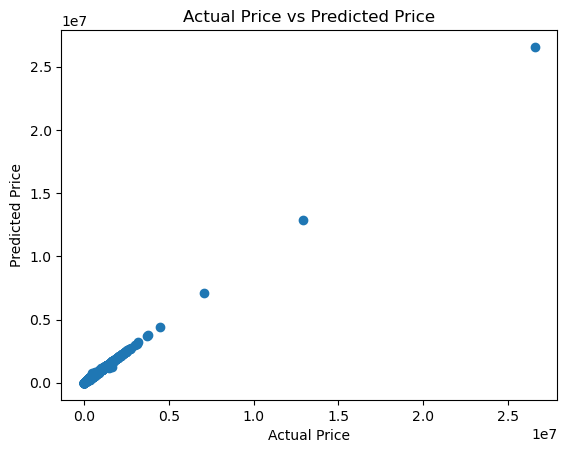

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

# Model Selection

Evalualtion of model based on performance:
1. Random Forest Regressor:

                   R Square error of training data: 0.932236699032797

                   R square Error testing data : 0.8013196866213423


2. Gradiant Boosting Regressor:

                   R square Error Training data : 0.999383350928062

                   R square Error testing data :  0.9823008876592976

#### Conclusion: Gradiant Boosting Regressor model is performing better

## cross Validation

In [ ]:
num_folds = 10  # Number of folds for cross-validation
scoring = 'r2'  # Scoring metric for evaluation (e.g., R-squared)

In [ ]:
# Perform cross-validation using the Gradiant Boosting Regressor model
cross_val_scores = cross_val_score(gbr, X_train, Y_train, cv=num_folds, scoring=scoring)

In [ ]:
#Cross Validation Score
print("Cross-validation scores:", cross_val_scores)
print("Average R-squared score:", cross_val_scores.mean())

Cross-validation scores: [0.71480139 0.98754489 0.9936928  0.94866929 0.94170305 0.99778619
 0.9023473  0.99839443 0.81358408 0.60331821]
Average R-squared score: 0.8901841634965233


In [ ]:
 dataset.to_csv(r'C:\Users\madhu\Downloads.csv',index=False)

                                                            **Thank You**